In [62]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\kiran\\Dental-Model\\dataset\\train',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 8621 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'Calculus': 0,
 'Data caries': 1,
 'Gingivitis': 2,
 'Mouth Ulcer': 3,
 'Tooth Discoloration': 4,
 'hypodontia': 5}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Calculus',
 'Data caries',
 'Gingivitis',
 'Mouth Ulcer',
 'Tooth Discoloration',
 'hypodontia']

In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

validation_generator = validation_datagen.flow_from_directory(
    "C:\\Users\\kiran\\Dental-Model\\dataset\\val",
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 1229 images belonging to 6 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\kiran\\Dental-Model\\dataset\\test",
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 2470 images belonging to 6 classes.


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),                       
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1000000)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                64000064  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 64,019,846
Trainable params: 64,019,846
Non-trainable params: 0
____________________________________________

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 269,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 20
)

Epoch 1/20
269/269 [==============================] - 125s 348ms/step - loss: 1.9258 - accuracy: 0.4606 - val_loss: 1.0571 - val_accuracy: 0.6094
Epoch 2/20
269/269 [==============================] - 84s 310ms/step - loss: 1.0306 - accuracy: 0.5685 - val_loss: 0.8452 - val_accuracy: 0.6250
Epoch 3/20
269/269 [==============================] - 89s 331ms/step - loss: 0.8941 - accuracy: 0.6328 - val_loss: 0.9339 - val_accuracy: 0.5521
Epoch 4/20
269/269 [==============================] - 92s 342ms/step - loss: 0.8062 - accuracy: 0.6710 - val_loss: 0.8421 - val_accuracy: 0.6510
Epoch 5/20
269/269 [==============================] - 86s 321ms/step - loss: 0.7273 - accuracy: 0.7024 - val_loss: 0.8614 - val_accuracy: 0.5625
Epoch 6/20
269/269 [==============================] - 88s 326ms/step - loss: 0.6594 - accuracy: 0.7309 - val_loss: 0.6301 - val_accuracy: 0.7604
Epoch 7/20
269/269 [==============================] - 85s 317ms/step - loss: 0.6019 - accuracy: 0.7568 - val_loss: 0.6080 - val_a

In [12]:
scores = model.evaluate(test_generator)


78/78 [==============================] - 28s 358ms/step - loss: 0.9615 - accuracy: 0.7061


In [13]:
scores

[0.9614790678024292, 0.7060728669166565]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 269}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
history.history['loss'][:5]  #show loss of first 5 epochs

[1.9258042573928833,
 1.030579686164856,
 0.8941123485565186,
 0.806194543838501,
 0.7273202538490295]

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
val_acc

[0.5833333134651184,
 0.5520833134651184,
 0.6145833134651184,
 0.671875,
 0.6510416865348816,
 0.7447916865348816,
 0.78125,
 0.7239583134651184,
 0.765625,
 0.7760416865348816,
 0.7708333134651184,
 0.7135416865348816,
 0.75,
 0.78125,
 0.8385416865348816,
 0.7864583134651184,
 0.8177083134651184,
 0.8125,
 0.8177083134651184,
 0.8177083134651184,
 0.859375,
 0.8645833134651184,
 0.8489583134651184,
 0.859375,
 0.8020833134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8229166865348816,
 0.7760416865348816,
 0.8697916865348816,
 0.8177083134651184,
 0.8125,
 0.84375,
 0.8645833134651184,
 0.84375,
 0.8385416865348816,
 0.8541666865348816,
 0.859375,
 0.828125,
 0.84375,
 0.8541666865348816,
 0.859375,
 0.8489583134651184,
 0.859375,
 0.8802083134651184,
 0.875,
 0.890625,
 0.8802083134651184,
 0.875,
 0.8385416865348816]

In [20]:
acc

[0.39329373836517334,
 0.5482593774795532,
 0.6120619177818298,
 0.6523460149765015,
 0.6813365817070007,
 0.7047386169433594,
 0.7229014039039612,
 0.7437419891357422,
 0.7634183168411255,
 0.7769239544868469,
 0.7853068113327026,
 0.8020724058151245,
 0.8074281215667725,
 0.8172080516815186,
 0.8246594667434692,
 0.8342065215110779,
 0.8517871499061584,
 0.856095016002655,
 0.8665735125541687,
 0.8633135557174683,
 0.8751891851425171,
 0.8736756443977356,
 0.8785656094551086,
 0.8909069895744324,
 0.886249840259552,
 0.8941669464111328,
 0.8910233974456787,
 0.9074397683143616,
 0.9063919186592102,
 0.895564079284668,
 0.9095354676246643,
 0.9063919186592102,
 0.9044126272201538,
 0.9144254326820374,
 0.9062754511833191,
 0.9126790165901184,
 0.9059261679649353,
 0.9146583080291748,
 0.9180346727371216,
 0.9198975563049316,
 0.920013964176178,
 0.9150075912475586,
 0.9228082299232483,
 0.9115146994590759,
 0.9235067963600159,
 0.9272325038909912,
 0.9228082299232483,
 0.9208289384841

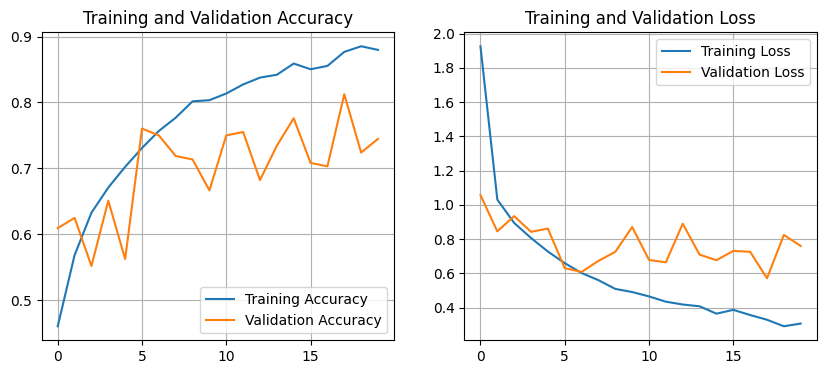

In [32]:
EPOCHS = 20

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()

first image to predict
actual label: Tooth Discoloration
predicted label: Tooth Discoloration


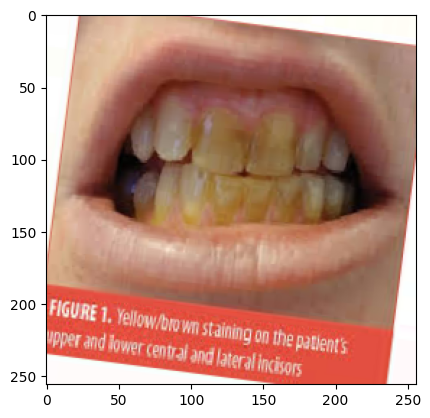

In [46]:
# run Predicition on a Sample Image

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break  

In [50]:
# function for interference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [54]:
  predictions = model.predict(test_generator)
  y_pred = np.round(predictions)

                     precision    recall  f1-score   support

           Calculus       0.11      0.13      0.12       260
        Data caries       0.20      0.26      0.23       521
         Gingivitis       0.22      0.24      0.23       471
        Mouth Ulcer       0.21      0.16      0.18       562
Tooth Discoloration       0.16      0.11      0.13       405
         hypodontia       0.09      0.10      0.09       251

           accuracy                           0.18      2470
          macro avg       0.17      0.17      0.16      2470
       weighted avg       0.18      0.18      0.18      2470



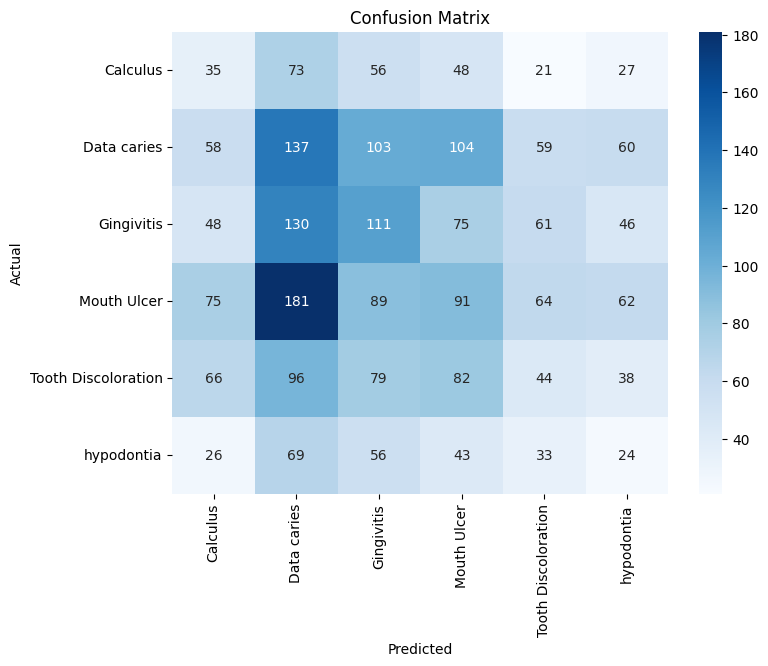

In [61]:


# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Now you can use y_pred_labels for classification report
print(classification_report(test_generator.classes, y_pred_labels, target_names=class_names))

# Now create the confusion matrix using y_pred_labels
conf_matrix = confusion_matrix(test_generator.classes, y_pred_labels)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


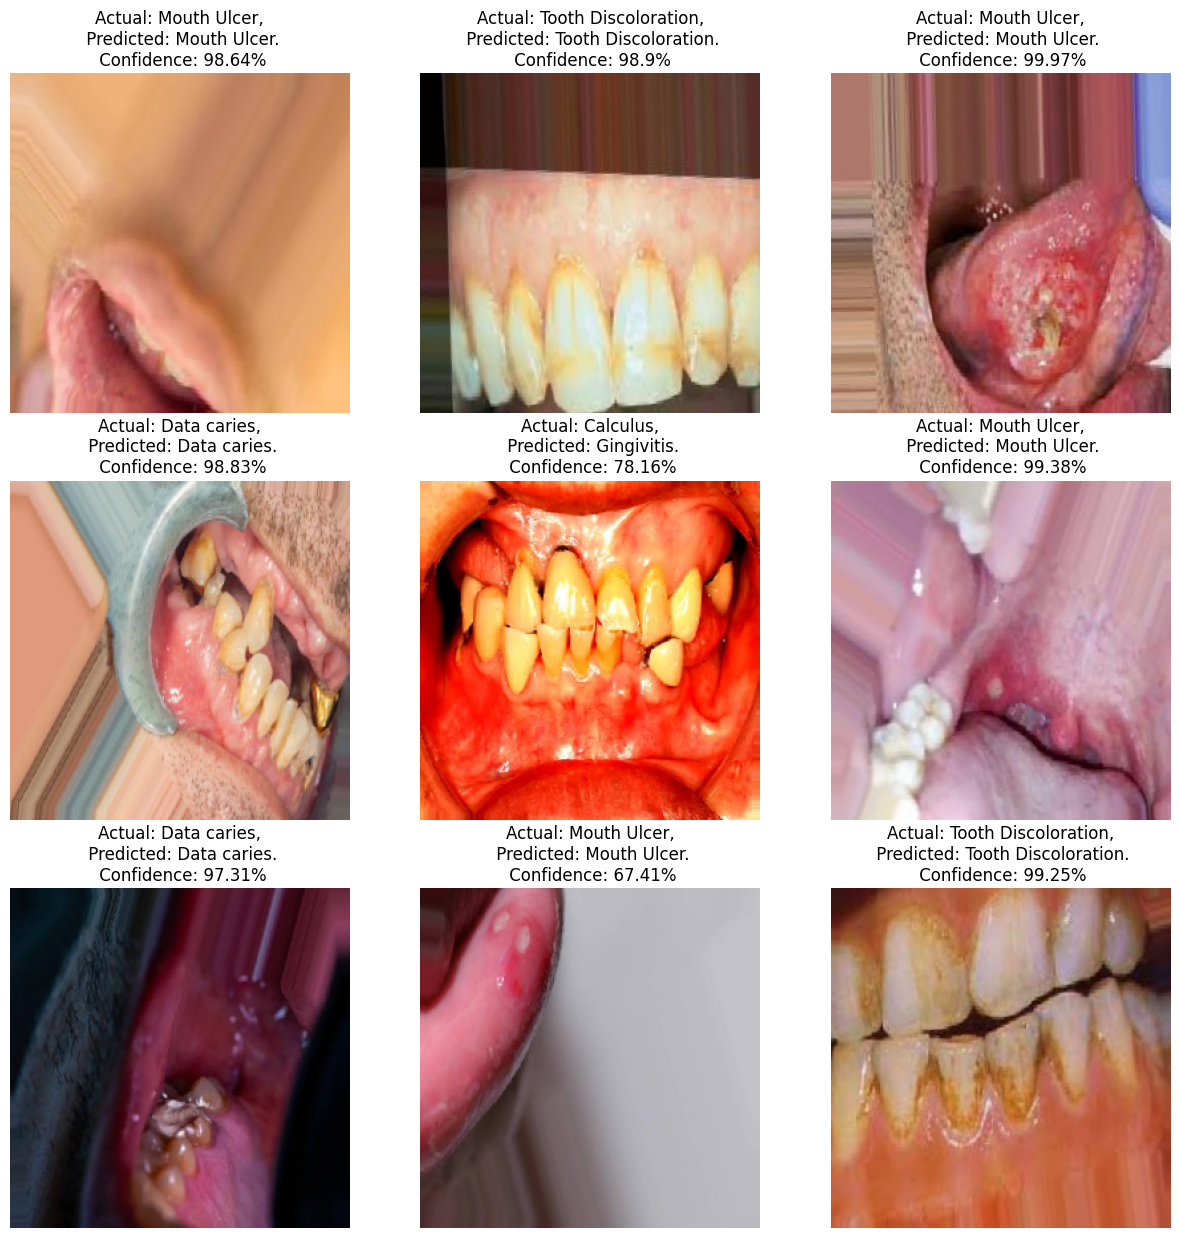

In [63]:
# running interfernce on a few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("Dental-Model\Models\2") 

INFO:tensorflow:Assets written to: C:\Users\kiran\Dental-Model\Models\2\assets


In [41]:
model.save("dixiIMGv1.h5") 